In [2]:
import csv
import numpy as np

def read_csv(file_path):
    data = []
    labels = []
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # Dòng đầu tiên là nhãn (tên của người)
            labels.append(row[0])
            # Các giá trị còn lại là các đặc trưng 128D
            data.append([float(x) for x in row[1:]])
    return np.array(data), np.array(labels)

# Đọc dữ liệu huấn luyện
X_train, y_train = read_csv('data/features_all_train.csv')

# Đọc dữ liệu kiểm tra
X_test, y_test = read_csv('data/features_all_test.csv')

X_test1, y_test1 = read_csv('data/features_all.csv')

In [3]:
import pandas as pd

# Đọc tệp dữ liệu huấn luyện (train) và thử nghiệm (test)
train_data = pd.read_csv('data/features_all_train.csv', header=None)
test_data = pd.read_csv('data/features_all_test.csv', header=None)
test_data1 = pd.read_csv('data/features_all.csv', header=None)
# Chuyển đổi sang mảng numpy
X_train = train_data.iloc[:, 1:].values  # Bỏ cột đầu tiên là tên và lấy các giá trị còn lại
y_train = train_data.iloc[:, 0].values   # Lấy cột đầu tiên là nhãn (tên)

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

X_test1 = test_data1.iloc[:, 1:].values
y_test1 = test_data1.iloc[:, 0].values

In [9]:
# from sklearn.metrics import accuracy_score

# # Dự đoán nhãn cho tập test X_test
# predicted_labels = []
# for face_descriptor_test in X_test:
#     min_distance = float('inf')
#     recognized_name = 'Unknown'

#     for j, face_descriptor_train in enumerate(X_train):
#         distance = return_euclidean_distance(face_descriptor_test, face_descriptor_train)
#         if distance < min_distance:
#             min_distance = distance
#             recognized_name = y_train[j]  # Assign recognized name from training set

#     predicted_labels.append(recognized_name)

# # Tính toán độ chính xác
# accuracy = accuracy_score(y_test, predicted_labels)
# print(f"Accuracy: {accuracy}")


In [4]:
from sklearn.metrics import accuracy_score

def return_euclidean_distance(feature_1, feature_2):
        feature_1 = np.array(feature_1)
        feature_2 = np.array(feature_2)
        dist = np.sqrt(np.sum(np.square(feature_1 - feature_2)))
        return dist
# Dự đoán nhãn cho tập test X_test
predicted_labels = []
for face_descriptor_test in X_test:
    min_distance = float('inf')
    recognized_name = 'Unknown'

    for j, face_descriptor_train in enumerate(X_train):
        distance = return_euclidean_distance(face_descriptor_test, face_descriptor_train)
        if distance < min_distance:
            min_distance = distance
            recognized_name = y_train[j]  # Assign recognized name from training set

    predicted_labels.append(recognized_name)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")


predicted_labels1 = []
for face_descriptor_test1 in X_test1:
    min_distance1 = float('inf')
    recognized_name1 = 'Unknown'

    for j, face_descriptor_train in enumerate(X_train):
        distance1 = return_euclidean_distance(face_descriptor_test1, face_descriptor_train)
        if distance1 < min_distance1:
            min_distance1 = distance1
            recognized_name1 = y_train[j]  # Assign recognized name from training set

    predicted_labels1.append(recognized_name1)

# Tính toán độ chính xác
accuracy1 = accuracy_score(y_test1, predicted_labels1)
print(f"Accuracy: {accuracy1}")


Accuracy: 0.9465648854961832
Accuracy: 0.0


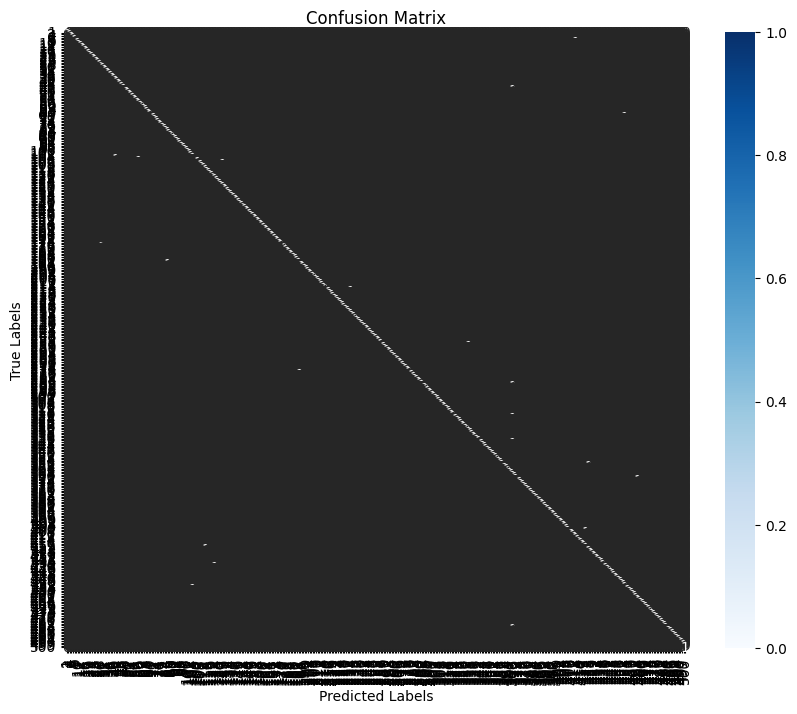

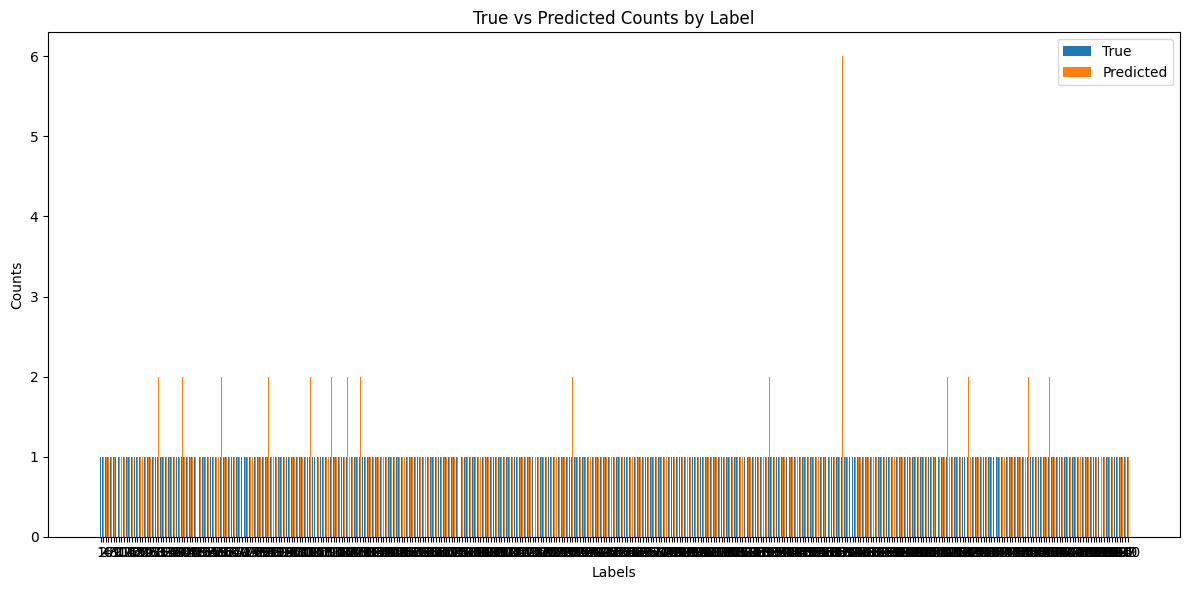

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Vẽ biểu đồ bar cho các nhãn thực tế và dự đoán
labels = np.unique(y_test)
true_counts = [np.sum(y_test == label) for label in labels]
predicted_counts = [np.sum(predicted_labels == label) for label in labels]

x = np.arange(len(labels))  # Vị trí các nhãn
width = 0.35  # Độ rộng của các thanh

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, true_counts, width, label='True')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('True vs Predicted Counts by Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [10]:

# Dự đoán nhãn cho tập test X_test
predicted_labels = []
for face_descriptor_test in X_test:
    min_distance = float('inf')
    recognized_name = 'Unknown'
    for j, face_descriptor_train in enumerate(X_train):
        distance = return_euclidean_distance(face_descriptor_test, face_descriptor_train)
        if distance < min_distance:
            min_distance = distance
            recognized_name = y_train[j]  # Assign recognized name from training set
    predicted_labels.append(recognized_name)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9465648854961832


Accuracy: 0.8986758779504893
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         2
         100       0.75      1.00      0.86         3
         101       1.00      0.80      0.89         5
         102       1.00      0.80      0.89         5
         103       1.00      1.00      1.00         5
         104       0.54      0.88      0.67         8
         105       0.00      0.00      0.00         1
         106       1.00      0.50      0.67         2
         107       0.67      1.00      0.80         4
         108       1.00      0.50      0.67         2
         109       1.00      1.00      1.00         5
          11       0.83      1.00      0.91        10
         110       1.00      0.71      0.83         7
         113       1.00      0.75      0.86         4
         114       1.00      0.75      0.86         4
         115       1.00      

C:\Users\HP VICTUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP VICTUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP VICTUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

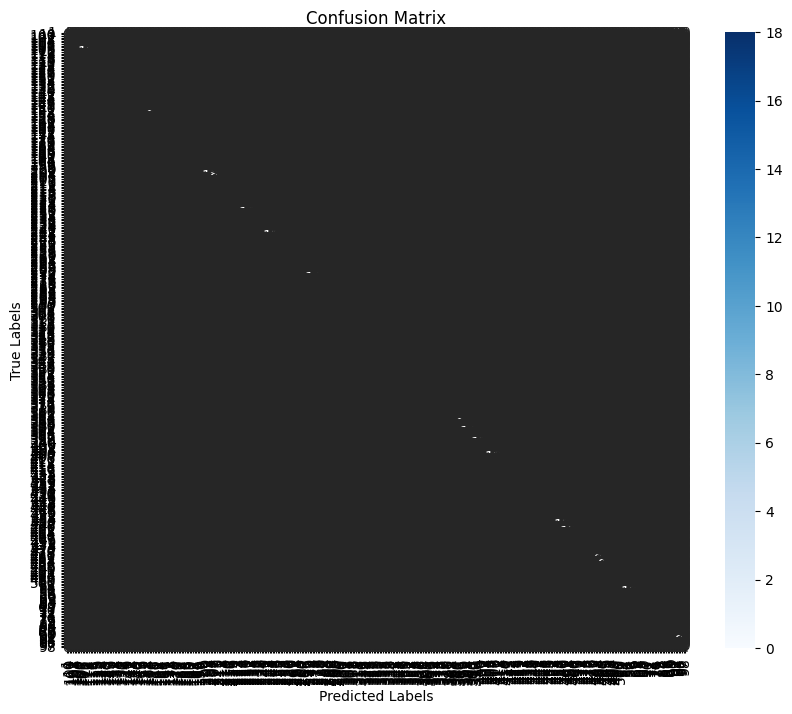

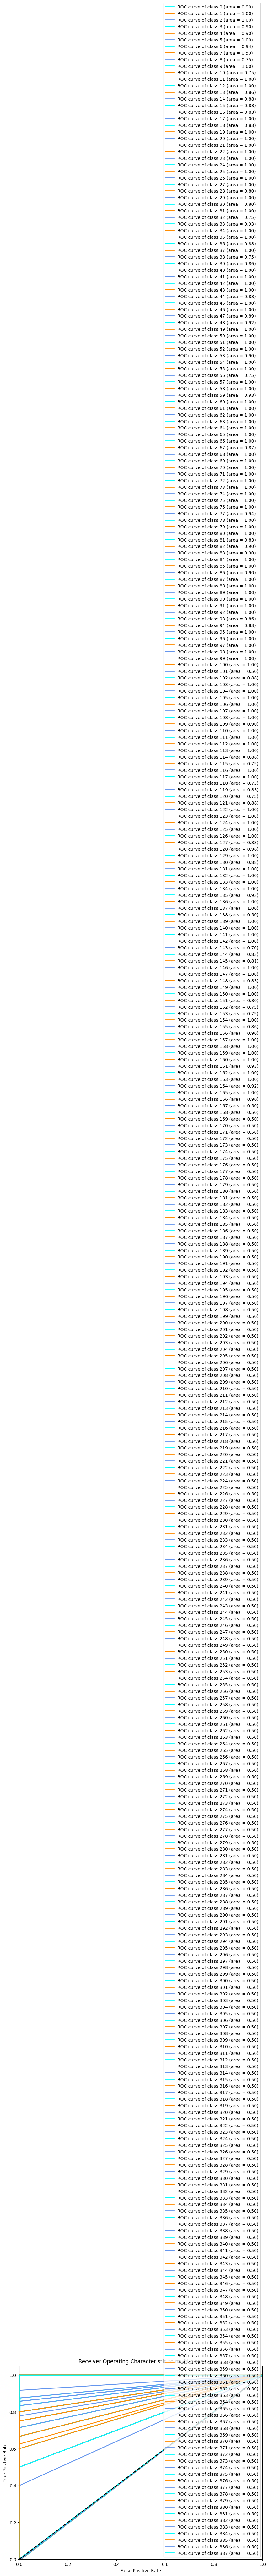

In [5]:
import dlib
import numpy as np
import os
from skimage import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.preprocessing import label_binarize

# Đường dẫn đến các tệp mô hình của dlib
PREDICTOR_PATH = "data/data_dlib/shape_predictor_68_face_landmarks.dat"
FACE_RECOGNITION_MODEL_PATH = "data/data_dlib/dlib_face_recognition_resnet_model_v1.dat"

# Khởi tạo các bộ nhận diện khuôn mặt
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor(PREDICTOR_PATH)
face_recognition_model = dlib.face_recognition_model_v1(FACE_RECOGNITION_MODEL_PATH)

def get_face_descriptor(image_path):
    image = io.imread(image_path)
    dets = detector(image, 1)

    if len(dets) == 0:
        return None
    
    shape = shape_predictor(image, dets[0])
    face_descriptor = face_recognition_model.compute_face_descriptor(image, shape)
    return np.array(face_descriptor)

# Trích xuất đặc trưng khuôn mặt từ thư mục chứa ảnh
def extract_features_labels(image_dir):
    features = []
    labels = []
    
    for label in os.listdir(image_dir):
        if os.path.isdir(os.path.join(image_dir, label)):
            for image_file in os.listdir(os.path.join(image_dir, label)):
                image_path = os.path.join(image_dir, label, image_file)
                face_descriptor = get_face_descriptor(image_path)
                if face_descriptor is not None:
                    features.append(face_descriptor)
                    labels.append(label)
    
    return np.array(features), np.array(labels)

# Thư mục chứa ảnh huấn luyện và kiểm tra
TRAIN_IMAGE_DIR = 'data/train'
TEST_IMAGE_DIR = 'data/test'

# Đọc dữ liệu huấn luyện và kiểm tra
X_train, y_train = extract_features_labels(TRAIN_IMAGE_DIR)
X_test, y_test = extract_features_labels(TEST_IMAGE_DIR)

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Báo cáo phân loại
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

# Vẽ confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Binarize the labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Dự đoán xác suất trên tập kiểm tra
y_score = knn.predict_proba(X_test)

# Tính toán ROC curve và ROC AUC cho mỗi lớp
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vẽ ROC curve
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
